 import libraries

In [1]:
%reload_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

import seaborn as sns

import pickle
##from SCRIPT.eval_tools import *

 let's load some data! 🥒

In [2]:
with open('pickle/timeseries_three_bedroom_subset_percent.pkl', 'rb') as fp:
    subset_percent = pickle.load(fp)

In [3]:
with open('pickle/timeseries_three_bedroom_subset.pkl', 'rb') as fp:
    subset = pickle.load(fp)

In [4]:
subset.head(6)

,95823,95630,95624,95758,95608,95828,95670,95757,95843,95610,...,95832,95814,95626,95811,95683,95693,95655,95638,95690,95641
01/2005,282589.0,436287.0,370305.0,356524.0,369821.0,297186.0,335201.0,397079.0,315396.0,334775.0,...,277606.0,464041.0,324681.0,463904.0,470132.0,601069.0,365057.0,428801.0,388938.0,345973.0
02/2005,288174.0,443572.0,377211.0,362575.0,375819.0,303235.0,340921.0,404666.0,320867.0,340658.0,...,285166.0,470748.0,331290.0,472786.0,477422.0,615153.0,367975.0,440956.0,395181.0,350869.0
03/2005,293166.0,450279.0,383672.0,368196.0,381050.0,309039.0,346429.0,410319.0,325827.0,345777.0,...,291309.0,476151.0,337711.0,481747.0,484770.0,627988.0,370073.0,451617.0,400314.0,354768.0
04/2005,298212.0,457074.0,390198.0,374022.0,386720.0,314793.0,351840.0,416989.0,330919.0,350992.0,...,297854.0,484083.0,343479.0,488934.0,491335.0,640279.0,376067.0,462529.0,405512.0,357274.0
05/2005,302843.0,463264.0,396224.0,379509.0,391590.0,320209.0,357154.0,422569.0,335771.0,355701.0,...,302915.0,490175.0,349125.0,493579.0,496864.0,651141.0,381405.0,472486.0,412746.0,360507.0
06/2005,308494.0,471017.0,402863.0,386326.0,397423.0,326574.0,363685.0,429204.0,341547.0,361480.0,...,308877.0,496153.0,356705.0,496531.0,505074.0,661539.0,387097.0,484356.0,423404.0,365966.0


In [5]:
subset_percent.head()

,95823,95630,95624,95758,95608,95828,95670,95757,95843,95610,...,95832,95814,95626,95811,95683,95693,95655,95638,95690,95641
02/2005,1.976369,1.669772,1.864949,1.697221,1.621866,2.035426,1.706439,1.910703,1.734645,1.757300,...,2.723284,1.445346,2.035536,1.914620,1.550628,2.343159,0.799327,2.834648,1.605140,1.415139
03/2005,1.732287,1.512043,1.712834,1.550300,1.391893,1.914027,1.615624,1.396955,1.545812,1.502680,...,2.154184,1.147748,1.938181,1.895361,1.539100,2.086473,0.570147,2.417702,1.298898,1.111241
04/2005,1.721209,1.509064,1.700932,1.582309,1.487994,1.861901,1.561936,1.625564,1.562793,1.508197,...,2.246755,1.665858,1.707969,1.491862,1.354250,1.957203,1.619680,2.416207,1.298481,0.706377
05/2005,1.552922,1.354266,1.544344,1.467026,1.259309,1.720496,1.510346,1.338165,1.466220,1.341626,...,1.699155,1.258462,1.643769,0.950026,1.125301,1.696448,1.419428,2.152730,1.783918,0.904908
06/2005,1.865983,1.673560,1.675567,1.796268,1.489568,1.987764,1.828623,1.570158,1.720220,1.624679,...,1.968209,1.219564,2.171142,0.598081,1.652364,1.596889,1.492377,2.512244,2.582218,1.514256


  train test split

In [6]:
trdf_percent = subset_percent.iloc[:-40]
trdf_percent.index = pd.to_datetime(trdf_percent.index)

In [7]:
trdf_price = subset.iloc[:-40]
trdf_price.index = pd.to_datetime(trdf_price.index)

 Average Percent Increase of Housing Price

In [8]:
subset_percent.head(3)

,95823,95630,95624,95758,95608,95828,95670,95757,95843,95610,...,95832,95814,95626,95811,95683,95693,95655,95638,95690,95641
02/2005,1.976369,1.669772,1.864949,1.697221,1.621866,2.035426,1.706439,1.910703,1.734645,1.757300,...,2.723284,1.445346,2.035536,1.914620,1.550628,2.343159,0.799327,2.834648,1.605140,1.415139
03/2005,1.732287,1.512043,1.712834,1.550300,1.391893,1.914027,1.615624,1.396955,1.545812,1.502680,...,2.154184,1.147748,1.938181,1.895361,1.539100,2.086473,0.570147,2.417702,1.298898,1.111241
04/2005,1.721209,1.509064,1.700932,1.582309,1.487994,1.861901,1.561936,1.625564,1.562793,1.508197,...,2.246755,1.665858,1.707969,1.491862,1.354250,1.957203,1.619680,2.416207,1.298481,0.706377


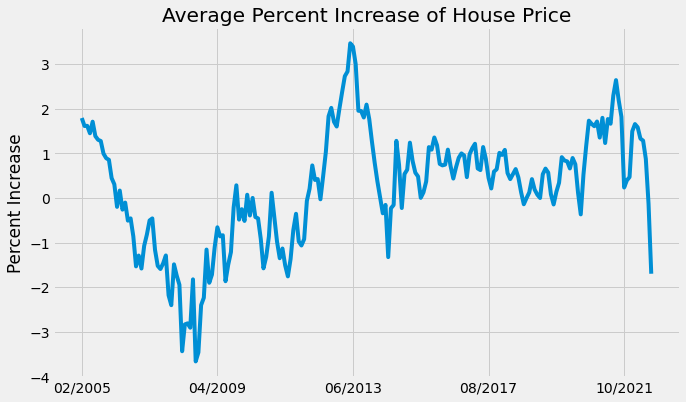

In [9]:
mean = np.mean(subset_percent, axis = 1)
ax = mean.plot(figsize = (10, 6))
plt.ylabel('Percent Increase')
plt.title('Average Percent Increase of House Price')
plt.show()

Average Housing Price

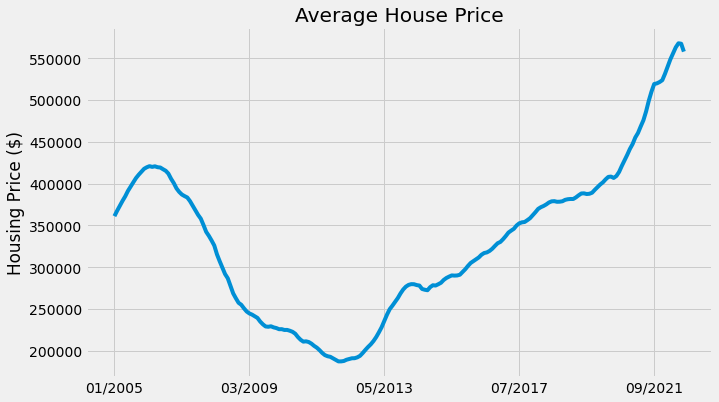

In [10]:
price_mean = np.mean(subset, axis = 1)
ax = price_mean.plot(figsize = (10, 6))
plt.ylabel('Housing Price ($)')
plt.title('Average House Price')
plt.show()

 Percent Increase All Zip Codes

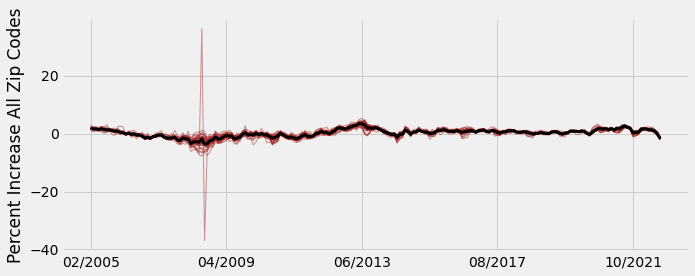

In [11]:
subset_percent.plot(figsize = (10, 4), lw = 1, color = 'brown', alpha = 0.5)
mean.plot(c = 'black', lw = 3)
plt.legend().set_visible(False)
plt.ylabel('Percent Increase All Zip Codes')
plt.show()

 Housing Price ($) All Zip Codes

In [12]:
subset.head(3)

,95823,95630,95624,95758,95608,95828,95670,95757,95843,95610,...,95832,95814,95626,95811,95683,95693,95655,95638,95690,95641
01/2005,282589.0,436287.0,370305.0,356524.0,369821.0,297186.0,335201.0,397079.0,315396.0,334775.0,...,277606.0,464041.0,324681.0,463904.0,470132.0,601069.0,365057.0,428801.0,388938.0,345973.0
02/2005,288174.0,443572.0,377211.0,362575.0,375819.0,303235.0,340921.0,404666.0,320867.0,340658.0,...,285166.0,470748.0,331290.0,472786.0,477422.0,615153.0,367975.0,440956.0,395181.0,350869.0
03/2005,293166.0,450279.0,383672.0,368196.0,381050.0,309039.0,346429.0,410319.0,325827.0,345777.0,...,291309.0,476151.0,337711.0,481747.0,484770.0,627988.0,370073.0,451617.0,400314.0,354768.0


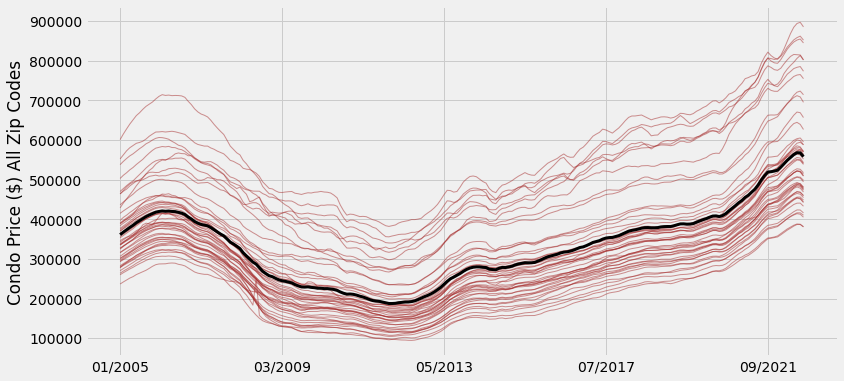

In [13]:
subset.plot(figsize = (12, 6), lw = 1, color = 'brown', alpha = 0.5)
price_mean.plot(c = 'black', lw = 3)
plt.legend().set_visible(False)
plt.ylabel('Condo Price ($) All Zip Codes')
plt.show()

 areas against the trend

 calculate absolute difference

In [14]:
diff_df = trdf_price.apply(lambda x: abs(x-mean))

 top 5 zipcodes with odd trends  

In [15]:
diffs = np.sum(diff_df, axis = 0).sort_values(ascending = False)
select_zipcodes = list(diffs.index[0:5])
print(f'top 5 zipcodes with odd trends: {select_zipcodes}')

top 5 zipcodes with odd trends: [95823, 95673, 95834, 95815, 95829]


 zip closest to average

In [16]:
print(f'closest to the average: {diffs.index[-2]}')

closest to the average: 95632
